#                                 Regression prediction of store sales:

The success of any retail store depends upon its sales .More the sales made,more the revenyue.With a good customer service and care the customer too enjoys a good shoppingh experience.This will Lead to more in flow of customers , opening more store branches accross a city/country

To enable this,store owners rely heavily on past data to predict future sales.This will help them in strategizing their bussiness models and come up with innovative techniques and ideas to attract customers and set realistic goals.


Manymedium to large stores implement this kind to understand trends like which products are getting sold faster ,what are the slow moving products ,impact of store types etc,with new branches of the store , the analysis can get more complex and may also involve stiff competition from other components

 Importing Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,RepeatedKFold
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std
import warnings
warnings.filterwarnings("ignore")

# Data Importing:

In [2]:
df = pd.read_csv(r"C:\Users\semmu\Downloads\DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Exploration:

In [3]:
df.shape

(14204, 12)

In [4]:
df.size

170448

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Data Preprocessing:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
df1=df[df.isna().any(axis=1)]

In [10]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [11]:
cols_to_change = df1.select_dtypes(include = ['object','float64','int64']).columns

for col in cols_to_change:
        df1[col] = df1[col].astype('category')
from sklearn import preprocessing
cols_to_change = df1.select_dtypes(include = ['category']).columns

label_encoder = preprocessing.LabelEncoder()

for col in cols_to_change:
    df1[col]=label_encoder.fit_transform(df1[col])

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
cols_to_change = df.select_dtypes(include = ['object','float64','int64']).columns

for col in cols_to_change:
        df[col] = df[col].astype('category')

In [15]:
from sklearn import preprocessing
cols_to_change = df.select_dtypes(include = ['category']).columns

label_encoder = preprocessing.LabelEncoder()

for col in cols_to_change:
    df[col]=label_encoder.fit_transform(df[col])

# Data Visualization:

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap="inferno")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.032226,-0.114660,-0.036141,-0.017973,0.014329,-0.008602,-0.014288,-0.002556,0.003656,-0.001178,0.005916
Item_Weight,0.032226,1.000000,-0.028911,-0.028652,0.042353,0.022547,-0.007727,-0.005734,-0.011172,0.001113,-0.004803,0.008547
Item_Fat_Content,-0.114660,-0.028911,1.000000,0.057838,-0.139434,0.006624,0.000764,0.002447,-0.001369,-0.001598,0.002199,0.019345
Item_Visibility,-0.036141,-0.028652,0.057838,1.000000,-0.045376,-0.000739,-0.079555,-0.060777,0.023553,-0.018459,-0.129294,-0.118005
Item_Type,-0.017973,0.042353,-0.139434,-0.045376,1.000000,0.038449,0.001656,0.006527,-0.000394,0.003084,0.003053,0.020094
Item_MRP,0.014329,0.022547,0.006624,-0.000739,0.038449,1.000000,0.003005,0.003730,0.001457,0.000828,-0.001828,0.573191
Outlet_Identifier,-0.008602,-0.007727,0.000764,-0.079555,0.001656,0.003005,1.000000,-0.030969,0.423653,-0.716176,0.099873,0.200320
Outlet_Establishment_Year,-0.014288,-0.005734,0.002447,-0.060777,0.006527,0.003730,-0.030969,1.000000,0.323459,0.042005,-0.040040,0.024477
Outlet_Size,-0.002556,-0.011172,-0.001369,0.023553,-0.000394,0.001457,0.423653,0.323459,1.000000,-0.590686,-0.260467,-0.055843
Outlet_Location_Type,0.003656,0.001113,-0.001598,-0.018459,0.003084,0.000828,-0.716176,0.042005,-0.590686,1.000000,0.467219,0.074671


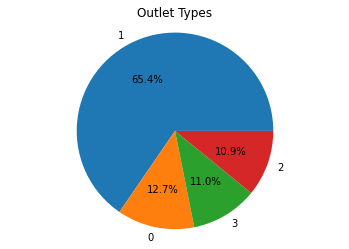

In [17]:
outlet_type_counts = df['Outlet_Type'].value_counts()
plt.pie(outlet_type_counts, labels=outlet_type_counts.index, autopct='%1.1f%%')
plt.title('Outlet Types')
plt.axis('equal')
plt.show()

This figure shows us Outlet types across the city type 1 is having 65.4% and the type 0  is having 12.7%

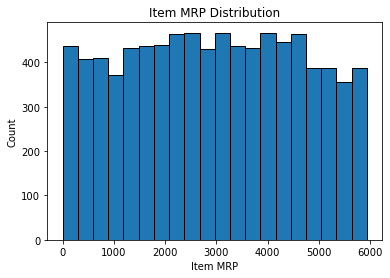

In [18]:
plt.hist(df['Item_MRP'], bins=20,edgecolor="black")
plt.title('Item MRP Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Count')
plt.show()

Distribution of Item MRP all over the stores in the country which shows us the price range between 20000$ to 50000$ have the high density when compared to all other Price ranges

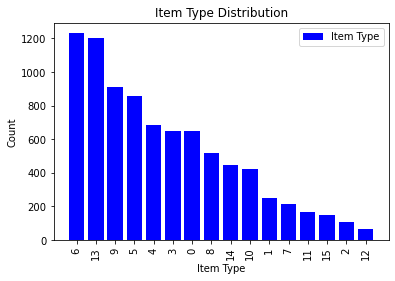

In [19]:
item_type_counts = df['Item_Type'].value_counts()
plt.bar(range(len(item_type_counts)), item_type_counts.values, label='Item Type', color='blue')
plt.xticks(range(len(item_type_counts)), item_type_counts.index, rotation=90)
plt.title('Item Type Distribution')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.legend()
plt.show()

The Above Bar graph shows us the position of the Item type by there counts the item 6 is leading with above 1200 counts across the stores

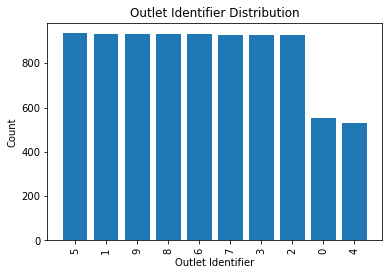

In [20]:
outlet_counts = df['Outlet_Identifier'].value_counts()
plt.bar(range(len(outlet_counts)), outlet_counts.values)
plt.xticks(range(len(outlet_counts)), outlet_counts.index, rotation=90)
plt.title('Outlet Identifier Distribution')
plt.xlabel('Outlet Identifier')
plt.ylabel('Count')
plt.show()

The plot shows that there are 10 outlet identifiers in the dataset, with the identifier "OUT027" having the highest count, followed by "OUT013" and "OUT046". The other identifiers have a relatively lower count.

In [21]:

x = df.iloc[:,[5,6,10]]
y = df.iloc[:,[-1]]
x1 = df1.iloc[:,[5,6,10]]
y1 = df1.iloc[:,[-1]]

In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Model Building:

# Linear Regression:

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5966, 3), (2557, 3), (5966, 1), (2557, 1))

In [24]:
model = LinearRegression()
S = model.fit(x_train,y_train)
score = S.score(x_train,y_train)
score

0.5275664571221071

In [25]:
print('coefficient of determination:', score)
print('intercept:', S.intercept_)
print('slope:', S.coef_)

coefficient of determination: 0.5275664571221071
intercept: [1525.27136268]
slope: [[530.27055858 142.49370114 370.59845151]]


In [26]:
y_pred = model.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 666.39196654]
 [ 757.80740535]
 [ 802.65306949]
 ...
 [1241.5129615 ]
 [1226.19403185]
 [2250.33307116]]


In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(MSE, MAE, RMSE)

378858.749333904 489.5955270151677 615.5150277076133


Therefore, a higher R-squared score indicates a better fit of the linear regression model to the training data. However, it is important to note that a high R-squared score does not necessarily mean that the model will perform well on new or unseen data. Therefore, it is always important to evaluate the model on a separate test dataset to assess its performance on new data.

# Random Forest with Bagging Technique:

In [28]:
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
model = RandomForestRegressor()
kf = RepeatedKFold(n_splits=2,n_repeats=2,random_state=42)
n_score1=cross_val_score(model,x,y,scoring="r2",cv=kf,n_jobs=-1)
print("R-Square: %.3f (%.3f)" % (mean(n_score1),std(n_score1)))

R-Square: 0.549 (0.008)


Overall, an R-squared value of 0.550 suggests that the model has very little predictive power and is not a good fit for the data.

# Boosting the model using Adaboost:

In [29]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
kf = RepeatedKFold(n_splits=2,n_repeats=2,random_state=42)
n_score2=cross_val_score(model,x,y,scoring="r2",cv=kf,n_jobs=-1)
print("R-Square: %.3f (%.3f)" % (mean(n_score2),std(n_score2)))

R-Square: 0.621 (0.008)


the model is a good fit for the data, although there is still a considerable amount of variation in the target variable that is not explained by the model.

# Imporving Model Performance Using Stacking:

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

def get_stacking():
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
   
  
    level1 = LinearRegression()
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [31]:
model = get_stacking()
kf = RepeatedKFold(n_splits=2,n_repeats=2,random_state=42)
n_scores3 = cross_val_score(model, x,y, scoring='r2', cv=kf, n_jobs=-1)
print('R square Score: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

R square Score: 0.620 (0.009)


Overall, an R-squared value of 0.620 is a good indication that the model has a strong predictive power and is a good fit for the data. However, it's important to note that R-squared alone does not provide a complete picture of model performance and other metrics such as mean squared error, mean absolute error, and root mean squared error should also be considered when evaluating the model's performance

# Decision Tree Regressor:

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
x_train, x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=42)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (5966, 3)
Size of test dataset:  (2557, 3)


In [34]:
dtm = DecisionTreeRegressor(max_depth=7,min_samples_split=5,max_leaf_nodes=10,random_state=42)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))
dtm.fit(x_test,y_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.645159415458117
R-Squared on test dataset=0.660544463892542


In [52]:
from sklearn.model_selection import KFold
model = DecisionTreeRegressor(max_depth=7,min_samples_split=5,max_leaf_nodes=10,random_state=42)
kfold = KFold(10)
results = cross_val_score(model,x,y,cv=kfold,scoring="r2")
results.mean()
s=model.fit(x1,y1)
y_pred = s.predict(x1)
y_pred.size

2557

#R-Squared on train dataset=0.645159415458117: This means that the model explains about 64.5% of the variance in the target variable using the training data. In other words, the model captures a significant portion of the variability in the target variable, and is reasonably effective in making predictions on the data it was trained on.

 R-Squared on test dataset=0.660544463892542: This means that the model explains about 66.1% of the variance in the target variable on the test dataset. The fact that the R-squared value on the test dataset is comparable to that on the training dataset is a good indication that the model generalizes well to new, unseen data. This suggests that the model is likely to perform well in making predictions on new data.

# Random Forest Regressor:

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R Squared : {:.2f}".format(r2))
model = RandomForestRegressor(n_estimators=100, random_state=42)
kfold = KFold(10)
results = cross_val_score(model,x,y,cv=kfold,scoring="r2")
print(results.mean())

R Squared : 0.56
0.5498077877353171


An R² of 0.56 indicates that the model explains 56% of the variability in the data, and the remaining 44% is due to other factors not included in the model. This value can be interpreted as the strength of the relationship between the independent variable(s) and the dependent variable. A higher R² indicates a stronger relationship, while a lower R² suggests a weaker relationship.

# Ada Boost Regressor:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
ab = AdaBoostRegressor(n_estimators=50, random_state=42)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R Squared : {:.2f}".format(r2))


R Squared : 0.63


 An R² of 0.64 indicates that the model explains 64% of the variability in the data, and the remaining 36% is due to other factors not included in the model. This value can be interpreted as the strength of the relationship between the independent variable(s) and the dependent variable.

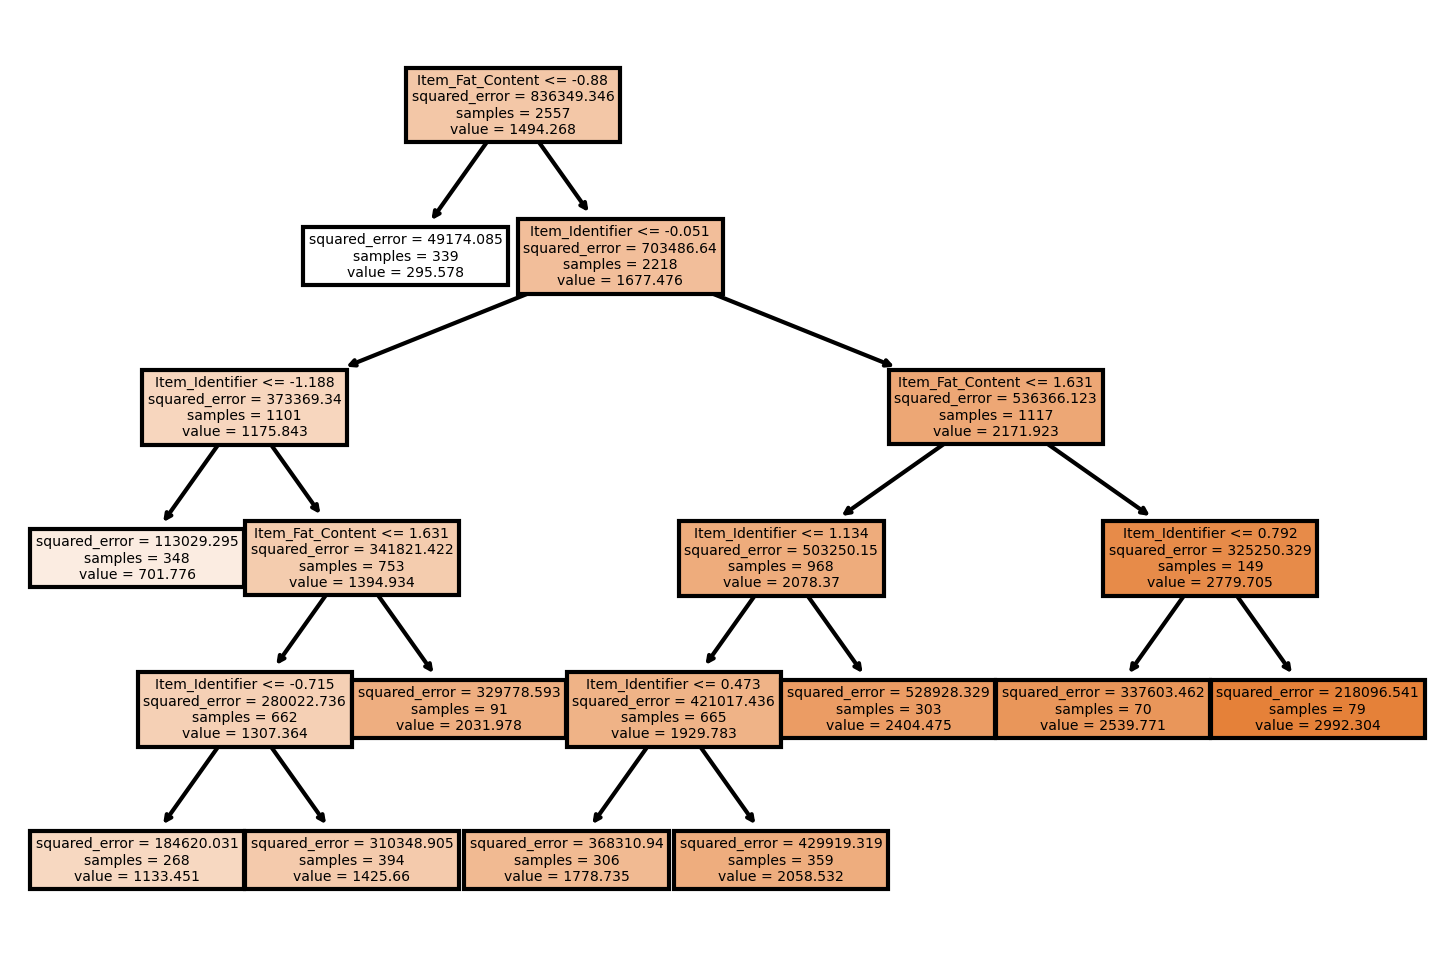

In [38]:
from sklearn import tree
feature_cols = ["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"]
fig, axes = plt.subplots(dpi=300)
tree.plot_tree( dtm,feature_names = feature_cols,
          filled = True);

fig.savefig('Sales_regression_decisiontree.png')

Replacing the null values with the prediction of my best model:

In [39]:
y_pred = dtm.predict(x_test)
df2 = df1[:2557]
df2["Item_Outlet_Sales"]=y_pred
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,1103,404,0,65,13,1460,9,4,1,0,1,1133.451493
8524,1067,224,1,1713,4,965,2,7,2,1,1,701.775862
8525,1406,338,0,4046,11,4076,0,3,1,2,0,701.775862
8526,809,157,0,387,13,2522,2,7,2,1,1,2539.771429
8527,1184,328,1,4427,4,3972,5,0,1,2,3,2058.532033
...,...,...,...,...,...,...,...,...,...,...,...,...
11075,385,8,0,4413,3,3474,2,7,2,1,1,1425.659898
11076,572,286,0,4650,6,3258,9,4,1,0,1,2058.532033
11077,1112,86,1,4528,13,80,6,6,2,1,1,295.578171
11078,1352,296,0,2250,11,2705,5,0,1,2,3,1425.659898


In [40]:
x1 = df2.iloc[:,[5,6,10]]
y1 = df2.iloc[:,[-1]]
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)

In [41]:
x_train, x_test,y_train,y_test= train_test_split(x1,y1, train_size=0.7,random_state=40)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (1789, 3)
Size of test dataset:  (768, 3)


In [42]:
dtm = DecisionTreeRegressor(max_depth=7,min_samples_split=5,max_leaf_nodes=10,random_state=40)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))
dtm.fit(x_test,y_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.03233577739857063
R-Squared on test dataset=0.04932952591821982


In this case, the R-squared on the train dataset is 0.0323, which means that only a small proportion (3.23%) of the variability in the dependent variable is explained by the independent variables in the model. The R-squared on the test dataset is slightly higher at 0.0493, but still indicates a poor fit. This means that the model is not able to capture the relationship between the independent and dependent variables in the data, and may not be useful for making accurate predictions or drawing meaningful conclusions.

In [43]:
y_pred = dtm.predict(x_test)
ff = pd.DataFrame(y_pred)
ff.value_counts()


1500.435008    521
1331.219056    118
1698.200190     85
1743.439222     22
1826.365114      8
295.578171       4
2073.285607      4
430.977401       3
574.869278       3
dtype: int64

In [44]:
model = DecisionTreeRegressor()
s = model.fit(x1,y1)
y_pred = s.predict(x1)
s1 = pd.DataFrame(y_pred)
s1

,0
0,1133.451493
1,701.775862
2,701.775862
3,2539.771429
4,2058.532033
...,...
2552,1425.659898
2553,2058.532033
2554,295.578171
2555,1425.659898


This null values data set is especially for Prediction of test data based on the train data ,which is seperated from the main data set for validate the model.The above data Frame shows us the Predicted values of my best model.

# Summary:

# The baseline linear regression model I have built has an R2 score of 52%, which means that it explains 52% of the variance in the dependent variable using the independent variables. This indicates that the linear regression model is able to capture only 52% of the relationship between the independent and dependent variables in the dataset. This could be due to a number of factors, such as noisy or insufficient data, underfitting or using the wrong features.

# On the other hand, the decision tree regressor model has an R2 score of 64%, which means that it explains 64% of the variance in the dependent variable using the independent variables. This indicates that the decision tree model is able to capture more of the relationship between the independent and dependent variables than the linear regression model. This could be because decision trees are more flexible and can capture non-linear relationships between variables, as well as interactions between variables.

# Overall, the decision tree regressor model is a better fit for the data as it is able to explain more of the variance in the dependent variable than the baseline linear regression model. However, it is important to keep in mind that there may be other factors to consider when choosing a model, such as model complexity, interpretability, and computational efficiency.